### Question
+ Predict if a patient will liev or die based on paramaters using ML

### Workflow
+ Data Prep
+ EDA
+ Feature seelction
+ Build Model
+ Interpret Model
+ Serialization
+ Prodction with Streamlit

In [282]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [250]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [62]:
  col_names = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", \
  "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", \
  "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME","HISTOLOGY"]

In [63]:
df = pd.read_csv('data/hepatitis.data', names=col_names)

In [64]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [65]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [66]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [67]:
# Data Types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [68]:
# Replace ? with 0
df = df.replace("?", 0)

In [69]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [70]:
# How many columns with object type
sum(df.dtypes == 'object')

15

In [71]:
df.columns[df.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [72]:
# Convert object into int32
# albumin and bilirubin are seems float like so we'll remove those before converting 

df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype('int32')

In [73]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype('float32')

In [74]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float32
alk_phosphate        int32
sgot                 int32
albumin            float32
protime              int32
histology            int64
dtype: object

### Narrative
+ Most of the data were in object
+ 2 of thwem were float like string

In [75]:
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [76]:
df.shape

(155, 20)

In [77]:
df.isnull().sum()
# Pay attention We already converted "?" into 0

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### EDA
+ Descriptive Analystics

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,155.0,1.793548,0.406070,1.0,2.00,2.0,2.0,2.0
age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.0,78.0
sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.0,2.0
steroid,155.0,1.496774,0.514393,0.0,1.00,2.0,2.0,2.0
antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.0,2.0
fatigue,155.0,1.341935,0.489350,0.0,1.00,1.0,2.0,2.0
malaise,155.0,1.593548,0.505769,0.0,1.00,2.0,2.0,2.0
anorexia,155.0,1.780645,0.430508,0.0,2.00,2.0,2.0,2.0
liver_big,155.0,1.709677,0.580727,0.0,2.00,2.0,2.0,2.0
liver_firm,155.0,1.470968,0.627401,0.0,1.00,2.0,2.0,2.0


In [79]:
## Labels
target_labels = {"Die":1, "Live":2}
#df['class'] = df['class'].map(target_labels)

In [80]:
# Value Counts
df['class'].value_counts(), df['class'].value_counts(normalize=True)

(2    123
 1     32
 Name: class, dtype: int64,
 2    0.793548
 1    0.206452
 Name: class, dtype: float64)

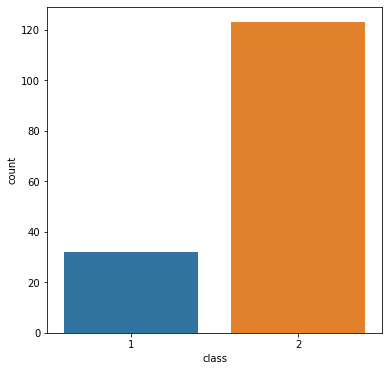

In [81]:
plt.figure(figsize=(6,6))
sns.countplot(x='class', data=df);

In [82]:
# How many males and females?
# 1--> Male 2--> Female
df['sex'].unique(), df['sex'].value_counts()

(array([2, 1]),
 1    139
 2     16
 Name: sex, dtype: int64)

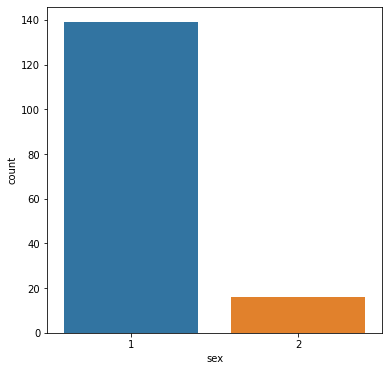

In [83]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df);

### Narrative
+ There are much more males than females

In [84]:
### Age Range
df.groupby(['age', 'sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

### Frequency Distribution Table using Age Range 

In [85]:
df['age'].min(), df['age'].max()

(7, 78)

In [86]:
labels = ['Less than 10', "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 and more"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] #bins should be one more than lables
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

In [87]:
freq_df = freq_df.reset_index(name='count')

In [88]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


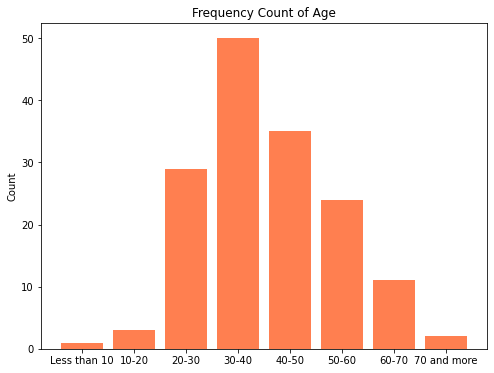

In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

plt.bar(freq_df['age'], freq_df['count'], color='coral')
plt.ylabel('Count')
plt.title('Frequency Count of Age');

### Narrative
+ Highest prevalence of Hepatitis is form 30-40 followed by 40-50
+ The least is under 10 and elderly above 70

### Checking Outliers
+ Univariate Analysis
+ Multivariate Analysis

### Methods
+ BoxPlot (Univariate)
+ Scatter Plot (Multi)
+ Z-score
+ IQR Interquartile Range

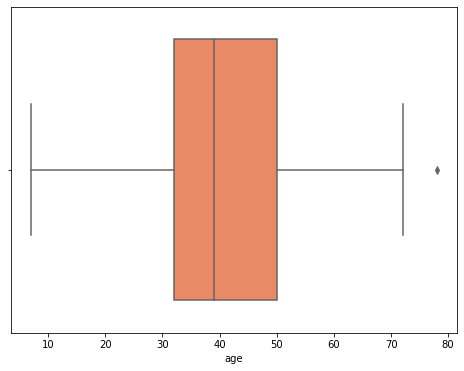

In [90]:
# Using Boxplot for Univariate Outlier Detection

sns.boxplot(df['age'], color='coral');

In [91]:
# This is the outlier
df[df['age']>75]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


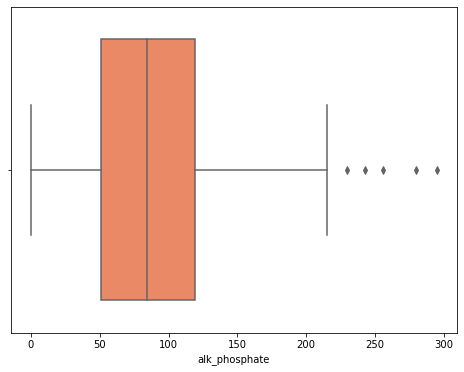

In [92]:
sns.boxplot(df['alk_phosphate'], color='coral');

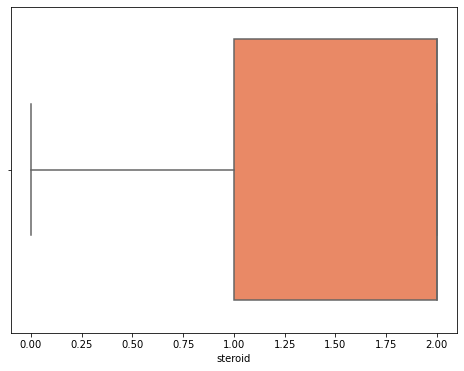

In [93]:
# Using Boxplot for Univariate Outlier Detection
sns.boxplot(df['steroid'], color='coral');

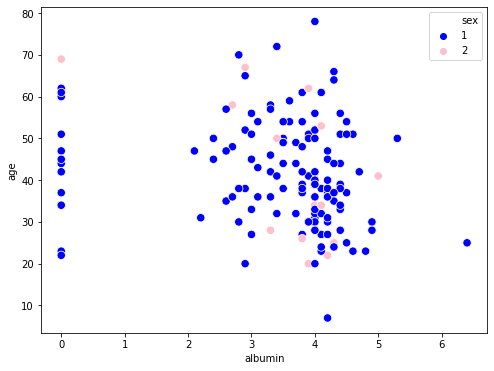

In [94]:
# Scatter Plot
sns.scatterplot(y=df['age'], x=df['albumin'], hue=df['sex'], palette=['blue', 'pink'], s=70);

In [95]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

### Using IQR to Detect Outliers 
+ H-Spread/Mid_spread
+ Measures the statisctical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [96]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [97]:
IQR = q3 - q1

In [98]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [99]:
# Get the actual datapoint that is an outlier

(df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR ))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narrative
+ The datapoints with True are the outlier

### Solution
+ Remove
+ Change
+ Ignore

In [100]:
df_no_outlier = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR ))).any(axis=1)]

In [101]:
df.shape
df_no_outlier.shape

(155, 20)

(43, 20)

In [102]:
### Burada dataset cok kucuk oldugu icin IGNORE edecegiz

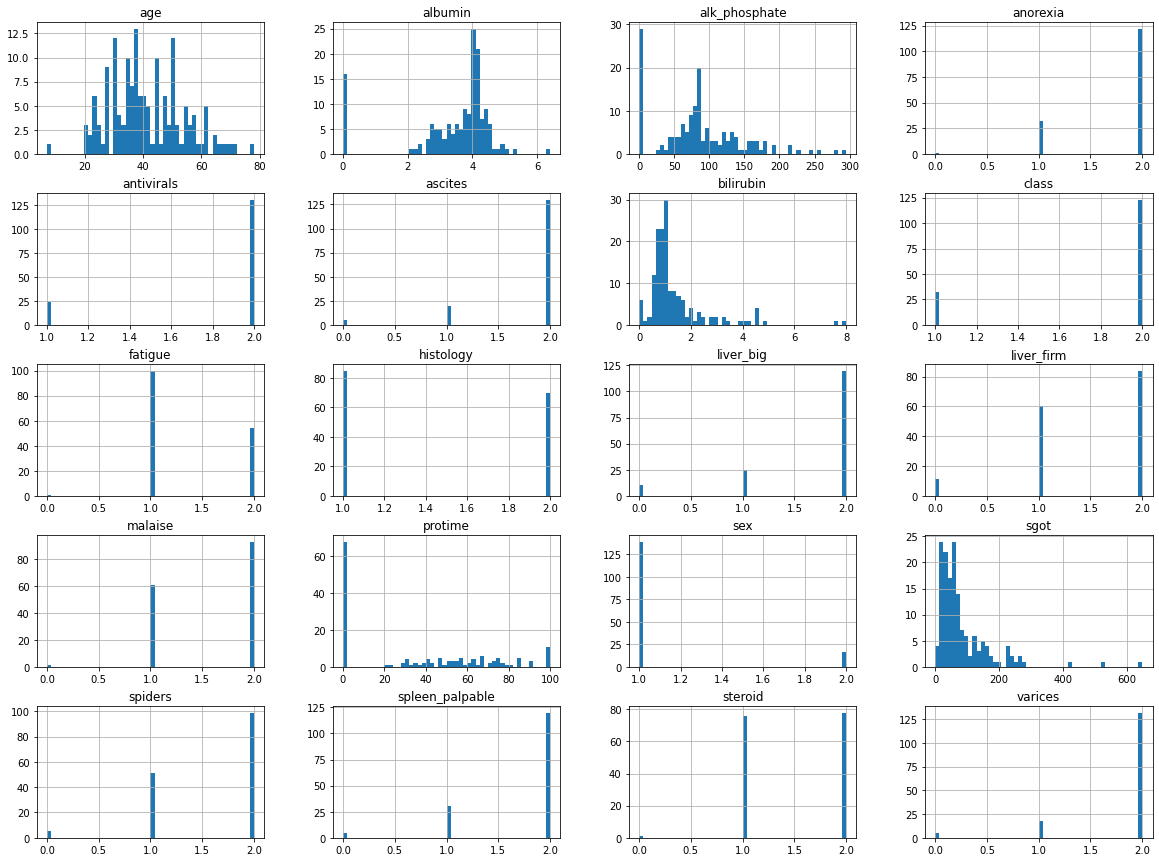

In [103]:
### Plot of Distribution of Data
df.hist(bins=50, figsize=(20,15));

### Feature Selection --> 1. SelectKBest
+ SelectKbest
  - Strong relation with the target
+ Recursive Feature Elimination

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [106]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [109]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

ylabels = df['class']

In [110]:
# Using SeleckKBest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [111]:
# The highest score shows the best fit
print("Scores : ", best_feature_fit.scores_)

Scores :  [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247155  17.88270548
  47.38820795   6.87318661 130.18332457   3.01854675]


In [113]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [116]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_Name'])
feature_column_names

,Feature_Name
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver_big
8,liver_firm
9,spleen_palpable


In [120]:
best_feature_df = pd.concat([feature_scores, feature_column_names], axis=1)
best_feature_df

,Feature_Scores,Feature_Name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [121]:
# Get the best features
# The higher Feature_Score the more importnat feature

best_feature_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_Name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873187,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


#### Feature Selection --> 2.Recursive Feature Elemination

In [123]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [124]:
logit = LogisticRegression()

In [129]:
rfe = RFE(logit, 8)

/Users/serdar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [131]:
rfe_fit = rfe.fit(xfeatures, ylabels)

/Users/serdar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/serdar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [132]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['ranking_Features']) 

In [134]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranking_features], axis=1)
rfe_feature_df
# True is selected to be eliminated, False ones are not selected.
# TRUE ones WILL BE ELIMITATED

,Feature_Name,Selected_Features,ranking_Features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


### Narrative
+ RFE we will eliminate the lowest ranking or True 

### Feature Selection --> 3.Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [137]:
from sklearn.ensemble import ExtraTreesClassifier

In [138]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [139]:
print(et_clf.feature_importances_)

[0.05828372 0.02312051 0.02780404 0.00954888 0.03067322 0.04948711
 0.02790845 0.03736818 0.05135112 0.04048457 0.0721618  0.08710075
 0.0534917  0.09553486 0.07048882 0.05222239 0.08723615 0.06248107
 0.06325267]


In [143]:
feature_importance_df = pd.DataFrame(et_clf.feature_importances_, index = xfeatures.columns, columns=['Feature_Score'])
feature_importance_df

,Feature_Score
age,0.058284
sex,0.023121
steroid,0.027804
antivirals,0.009549
fatigue,0.030673
malaise,0.049487
anorexia,0.027908
liver_big,0.037368
liver_firm,0.051351
spleen_palpable,0.040485


In [145]:
feature_importance_df.nlargest(10, ['Feature_Score'])

,Feature_Score
bilirubin,0.095535
albumin,0.087236
ascites,0.087101
spiders,0.072162
alk_phosphate,0.070489
histology,0.063253
protime,0.062481
age,0.058284
varices,0.053492
sgot,0.052222


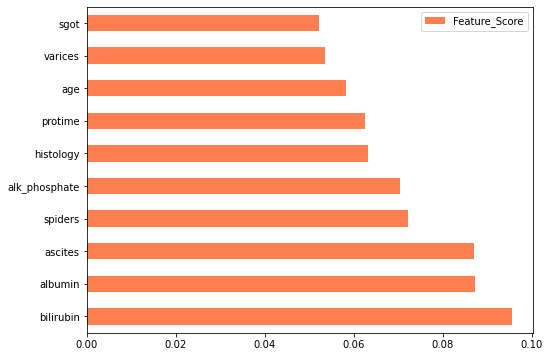

In [147]:
feature_importance_df.nlargest(10, ['Feature_Score']).plot(kind='barh', color='coral');

### Narrative
+ All methods gave us almost the same features to use

### Correlation

In [149]:
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


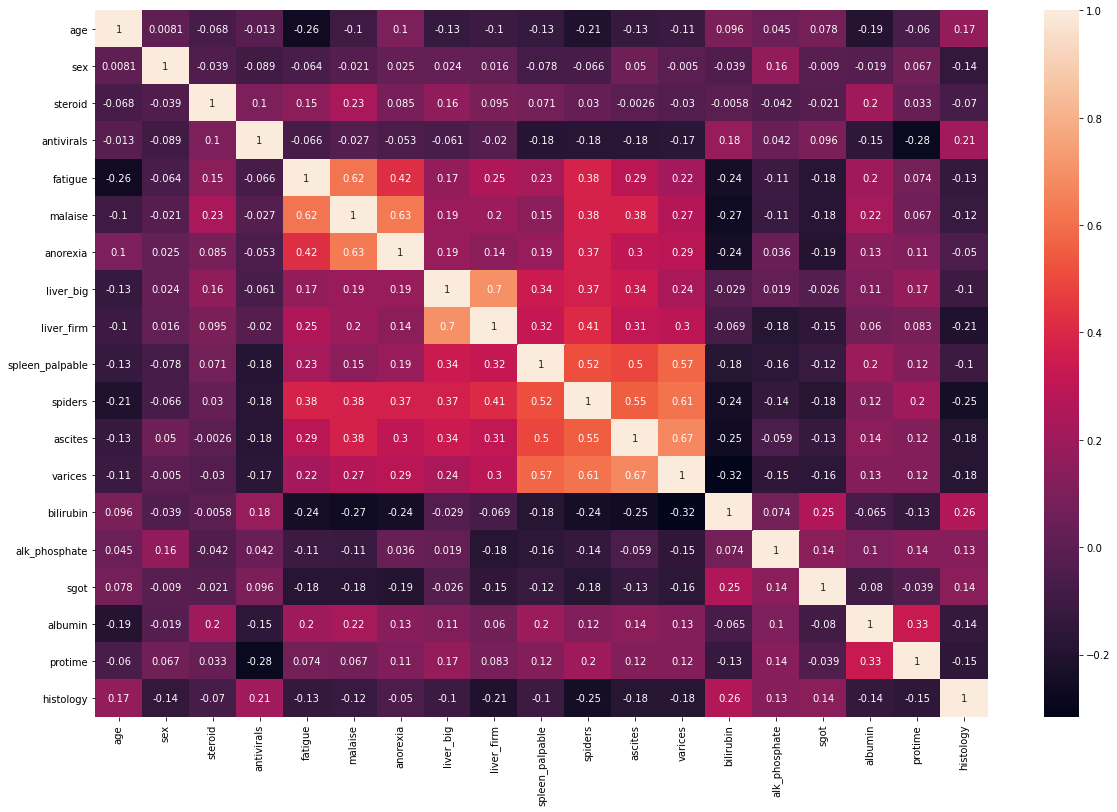

In [157]:
# Heatmap for Correlation
rcParams['figure.figsize'] = 20,13
sns.heatmap(xfeatures.corr(), annot=True);

### Model Building
+ Feature & Labels
+ Train/Test Split
+ Logistic Regression
+ RF
+ DCT
+ Serialize

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [164]:
# Selected Features (Let's use best_feature_df for now)
best_feature_df.nlargest(12, 'Feature_Scores')['Feature_Name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [165]:
selected_features = ['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices']

In [168]:
xfeatures_best = df[selected_features]

In [169]:
xfeatures_best.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,ascites,varices
0,0,18,1.0,30,85,4.0,2,1,2,2,2,2
1,0,42,0.9,50,135,3.5,2,1,2,1,2,2
2,0,32,0.7,78,96,4.0,2,1,2,1,2,2
3,80,52,0.7,31,46,4.0,2,1,2,2,2,2
4,0,200,1.0,34,0,4.0,2,1,2,2,2,2


In [171]:
# Train test split of dataset

X_train, X_test, y_train, y_test = train_test_split(xfeatures, ylabels, \
                                                      test_size=0.3, random_state=4299)

In [170]:
# Train test split of dataset

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, \
                                                      test_size=0.3, random_state=4299)

### Logistic Regression

In [251]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [174]:
# Model Accuracy
# Method 1
logreg.score(X_test, y_test)

0.7446808510638298

In [175]:
df['class'].value_counts(normalize=True)
# data is quite imbalanced and Accuracy is not a good matrix here

2    0.793548
1    0.206452
Name: class, dtype: float64

In [176]:
# Method 2
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7446808510638298

In [177]:
# Model for best features
model_logit = LogisticRegression()
model_logit.fit(X_train_b, y_train_b)

/Users/serdar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [179]:
y_pred2 = model_logit.predict(X_test_b)
accuracy_score(y_test_b, y_pred2)

0.7446808510638298

In [182]:
### Single Prediction
X_test.iloc[1]

age                 36.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              2.0
malaise              2.0
anorexia             2.0
liver_big            2.0
liver_firm           2.0
spleen_palpable      2.0
spiders              2.0
ascites              2.0
varices              2.0
bilirubin            0.7
alk_phosphate       62.0
sgot               224.0
albumin              4.2
protime            100.0
histology            1.0
Name: 81, dtype: float64

In [183]:
result_dict = {"Die":1, "Live":2}
x1 = X_test.iloc[1] 

In [186]:
# Reshaping
# Need to convert into np array and format of 1 row with multiple columns (reshape(1, -1))
logreg.predict(np.array(x1).reshape(1,-1))

array([2])

### Decision Tree

In [189]:
### Another Algoritm

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train_b, y_train_b)

DecisionTreeClassifier()

In [190]:
y_pred3 = model_dt.predict(X_test_b)
accuracy_score(y_test_b, y_pred3)

0.7659574468085106

### KNN

In [200]:
### KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)

In [201]:
model_knn.fit(X_train_b, y_train_b)
model_knn.score(X_test_b, y_test_b)

KNeighborsClassifier(n_neighbors=7)

0.723404255319149

### Random Forest

In [212]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_b, y_train_b)
model_rf.score(X_test_b, y_test_b)

RandomForestClassifier()

0.7659574468085106

### Save Our Model
+ Serialization
+ Pickle
+ Joblib
+ numpy/json/ray

In [217]:
### Using joblib
import joblib

In [230]:
model_file_logit=  open('LogisticRegression_hepB_model.pkl', 'wb')
joblib.dump(model_logit, model_file_logit)
model_file_logit.close()

In [213]:
model_file =  open('Random_Forest_hepB_model.pkl', 'wb')
joblib.dump(model_rf, model_file)
model_file.close()

In [215]:
model_file_knn =  open('KNN_hepB_model.pkl', 'wb')
joblib.dump(model_knn, model_file_knn)
model_file_knn.close()

### Interpretation Model & Evaluation
+ Eli5
+ Lime
+ SHAP
+ Skater

In [219]:
# Interpretting with Lime

import lime
import lime.lime_tabular

In [220]:
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Lime Explanier
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [225]:
selected_features

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue',
 'ascites',
 'varices']

In [226]:
target_labels

{'Die': 1, 'Live': 2}

In [227]:
class_names = ["Die(1)", "Live(2)"]

In [229]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_b.values, 
                                                   feature_names=selected_features,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [235]:
### Single datapoint prediction

In [240]:
x1 = X_test_b.iloc[2]

In [241]:
model_logit.predict(np.array(x1).reshape(1,-1))

array([2])

In [242]:
# We have used 12 features to build the model(12 out of 19)
exp = explainer.explain_instance(x1, model_logit.predict_proba, 
                                 num_features=12, top_labels=1)

In [243]:
exp.show_in_notebook(show_table=True, show_all=False)

In [244]:
# Explanation as List
exp.as_list()

[('histology <= 1.00', 0.17359621605007794),
 ('1.00 < spiders <= 2.00', 0.12628211352875268),
 ('albumin > 4.20', 0.07098991926097635),
 ('0.70 < bilirubin <= 1.00', 0.0684512121080488),
 ('age > 51.00', -0.06090541451623978),
 ('malaise <= 1.00', -0.04665526882688908),
 ('protime > 66.00', 0.03890067719924551),
 ('29.75 < sgot <= 52.50', -0.023167106570181322),
 ('fatigue <= 1.00', -0.017733931030196756),
 ('45.50 < alk_phosphate <= 84.50', 0.0052356493490583874),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

### Uisng Eli5

In [246]:
import eli5

In [255]:
# Show how each feature contibutes
eli5.show_weights(model_logit, feature_names=selected_features, 
                  target_names= class_names, top=10)

In [257]:
eli5.show_prediction(model_logit, x1, feature_names=selected_features, 
                  target_names= class_names, top=10)

### Evaluation of Model
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

In [259]:
from sklearn.metrics import confusion_matrix

In [260]:
y_pred = model_logit.predict(X_test_b)

# Accuracy_Score
accuracy_score(y_test_b, y_pred)

0.7446808510638298

In [261]:
# Confusion Matrix
confusion_matrix(y_test_b, y_pred)

array([[ 5,  6],
       [ 6, 30]])

In [262]:
from sklearn.metrics import plot_confusion_matrix

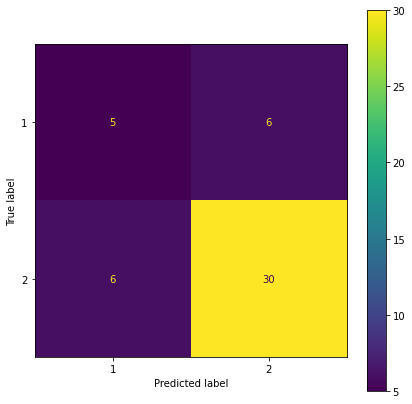

In [271]:
rcParams['figure.figsize'] = 7, 7
plot_confusion_matrix(model_logit, X_test_b, y_test_b);

In [276]:
tp, tf, fn, tn = confusion_matrix(y_test_b, y_pred).ravel()

In [277]:
tp, tf, fn, tn

(5, 6, 6, 30)

In [294]:
### Alterantive way from pandas_ml

# from pandas_ml import ConfusionMatrix
# cm = ConfusionMatrix(y_test_b, y_pred)

# cm.print_stats()
# cm.plot(normalized=True)

In [289]:
from sklearn.metrics import jaccard_score

In [278]:
### Classification Report

from sklearn.metrics import classification_report

In [280]:
print(classification_report(y_test_b, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.45      0.45        11
           2       0.83      0.83      0.83        36

    accuracy                           0.74        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.74      0.74      0.74        47



In [281]:
print(classification_report(y_test_b, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.45      0.45      0.45        11
     Live(2)       0.83      0.83      0.83        36

    accuracy                           0.74        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.74      0.74      0.74        47

